In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
file=files.upload()

Saving Tesla.csv - Tesla.csv.csv to Tesla.csv - Tesla.csv.csv


In [20]:
df=pd.read_csv('Tesla.csv - Tesla.csv.csv')

In [21]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [23]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [24]:
df.shape

(1692, 7)

In [25]:
df.size

11844

In [26]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


In [40]:
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()


In [41]:
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [42]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-03-04,177.529999,180.139999,177.490005,177.580002,177.580002,37381500,AMAZON
2024-03-05,176.929993,176.929993,173.300003,174.119995,174.119995,37228300,AMAZON
2024-03-06,175.539993,176.460007,173.259995,173.509995,173.509995,32090900,AMAZON
2024-03-07,174.830002,177.990005,173.720001,176.820007,176.820007,34063300,AMAZON
2024-03-08,176.440002,178.789993,174.330002,175.350006,175.350006,37853500,AMAZON
2024-03-11,174.309998,174.470001,171.470001,171.960007,171.960007,28484800,AMAZON
2024-03-12,173.500000,176.759995,171.979996,175.389999,175.389999,36610600,AMAZON
2024-03-13,175.899994,177.619995,175.550003,176.559998,176.559998,30772600,AMAZON
2024-03-14,177.690002,179.529999,176.470001,178.750000,178.750000,43705800,AMAZON


In [52]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,197.620834,199.488085,195.883320,197.790195,197.321483,4.006933e+07
std,90.472738,91.104838,89.739816,90.488580,90.016836,2.102791e+07
min,98.070000,98.300003,95.699997,97.239998,97.239998,8.828600e+06
25%,132.862495,134.005005,131.317505,133.069996,133.069996,2.235662e+07
50%,167.320000,168.835007,165.705002,167.540001,166.910004,3.818485e+07
75%,216.865002,218.464996,215.129997,216.640003,215.896626,5.230735e+07
max,420.559998,427.820007,417.989990,425.220001,425.220001,1.529387e+08


In [53]:
df.corr()

<ipython-input-53-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999839,0.999843,0.999625,0.999609,-0.304309
High,0.999839,1.000000,0.999841,0.999831,0.999807,-0.302608
Low,0.999843,0.999841,1.000000,0.999869,0.999856,-0.306269
Close,0.999625,0.999831,0.999869,1.000000,0.999985,-0.304845
Adj Close,0.999609,0.999807,0.999856,0.999985,1.000000,-0.305076
Volume,-0.304309,-0.302608,-0.306269,-0.304845,-0.305076,1.000000


<ipython-input-67-af56be6f6b6a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.drop('company_name',axis=1))


<Axes: ylabel='Density'>

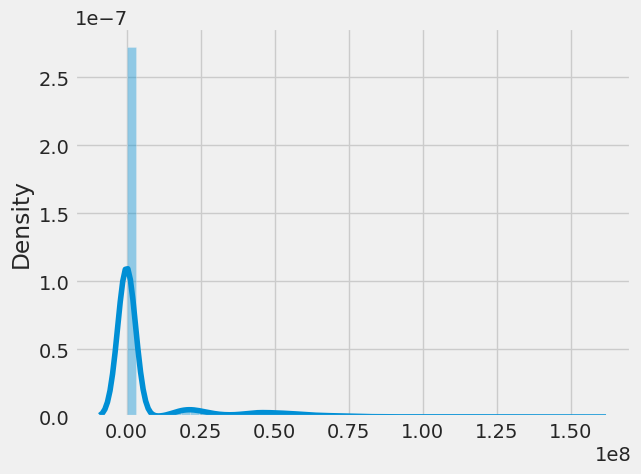

In [67]:
sns.distplot(df.drop('company_name',axis=1))

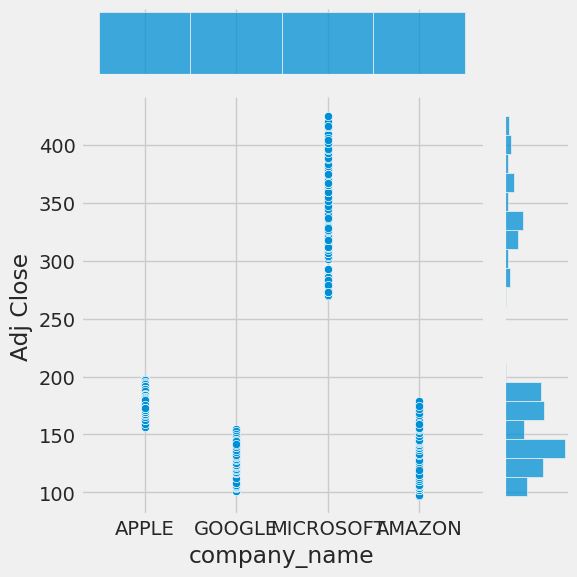

In [49]:
sns.jointplot(x='company_name', y='Adj Close', data=df, kind='scatter')
plt.tight_layout()

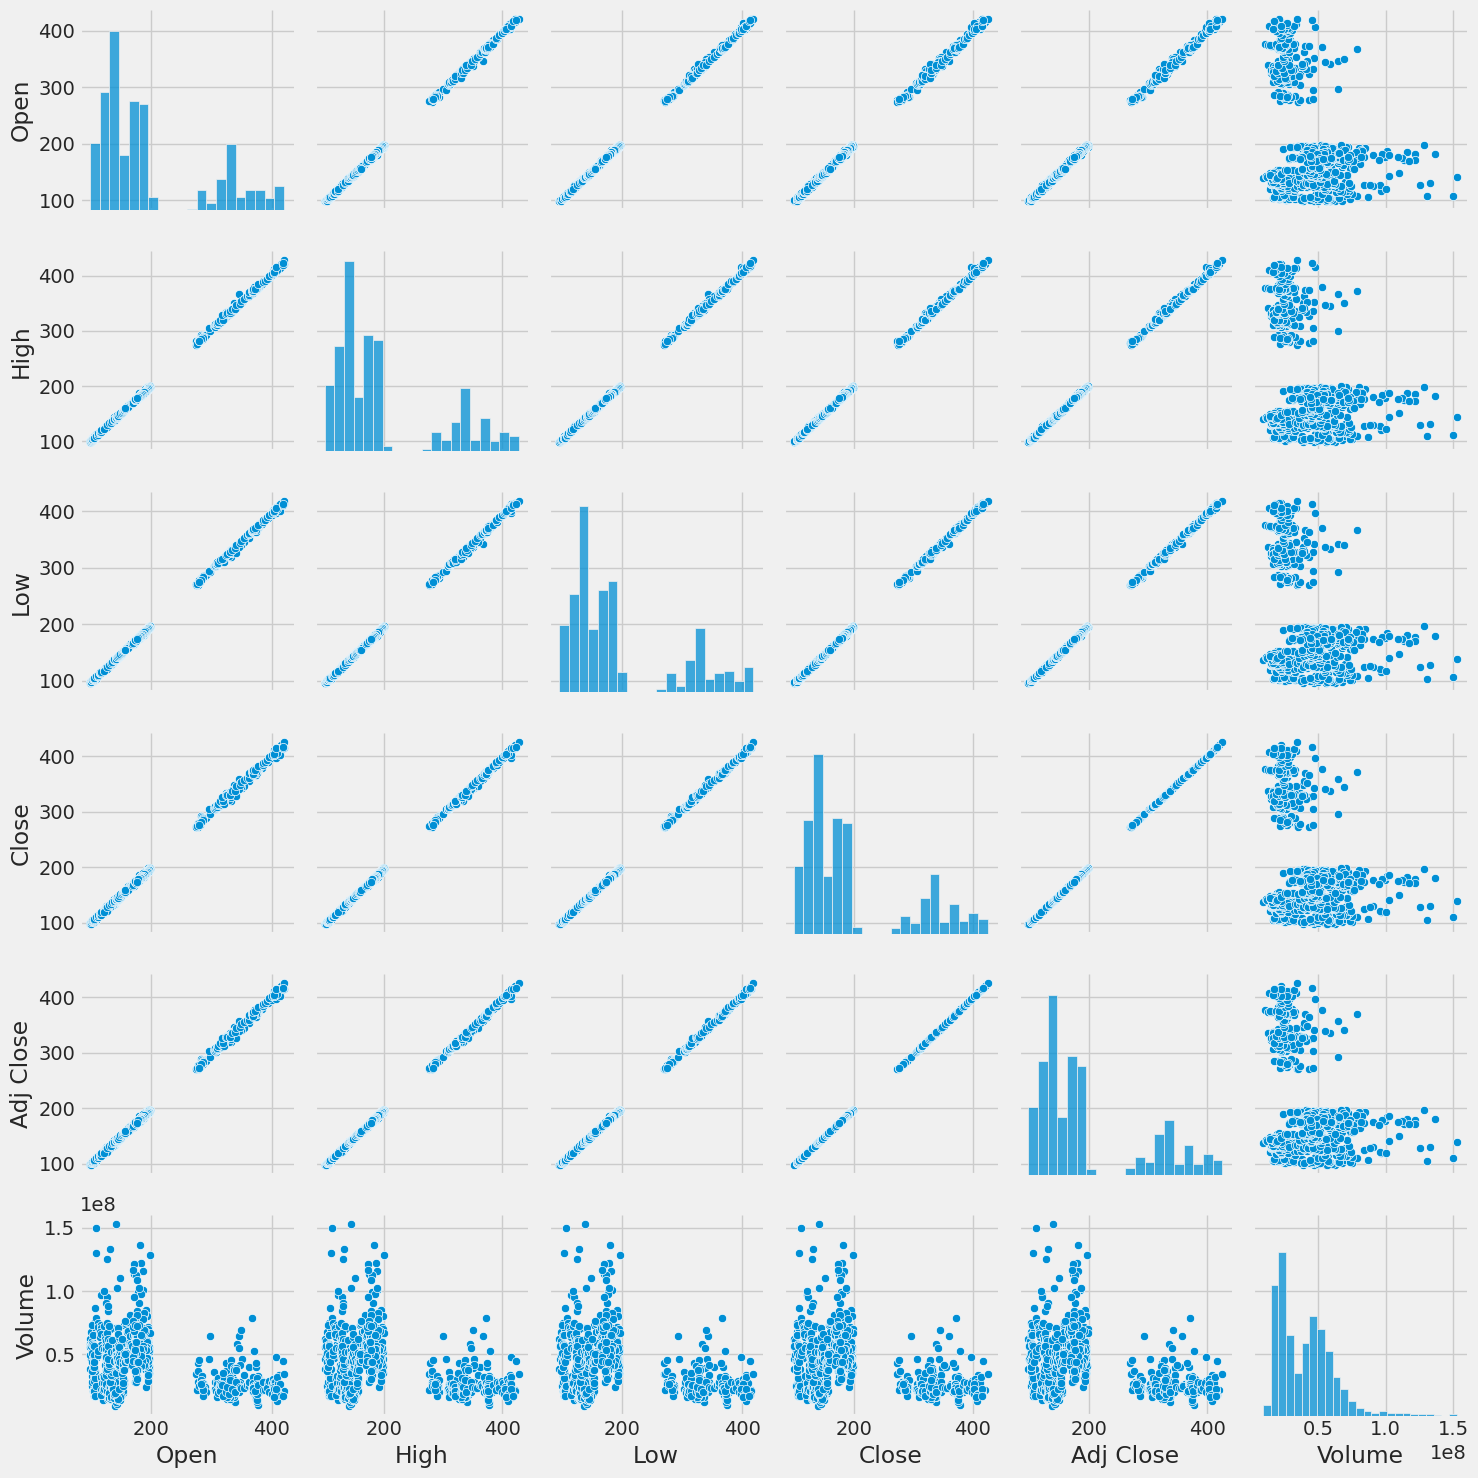

In [51]:
sns.pairplot(df)
plt.tight_layout()

In [27]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Close'])
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [36]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
predictions = rf_regressor.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print('Mean Absolute Error:', mae)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE:", rmse)

Mean Absolute Error: 0.15338813227138118
RMSE: 0.4387950952254472


In [13]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [33]:
sid = SentimentIntensityAnalyzer()
def get_sentiment_score(text):
    sentiment_score = sid.polarity_scores(text)
    return sentiment_score['compound']
sample_text = "Tesla announces record-breaking sales!"
sentiment_score = get_sentiment_score(sample_text)
print("Sentiment Score:", sentiment_score)


Sentiment Score: 0.0
